该模型由来自先前模型的50%随机森林、50% XGBoost

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt
from sklearn.model_selection import cross_val_predict

In [18]:

df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")



df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


XGBoost - 原数据加载

Train RMSE: 594.5792650959186
Test RMSE: 2580.873616298751
Train R²: 0.9885621864051578

Test R²: 0.7529165829591934

XGBoost - 原数据去除异常值 ，只分train test

Train RMSE: 580.3602971267801
Test RMSE: 1763.8500025844057

Train R²: 0.9683417138724735
Test R²: 0.694893574433465

Train MAPE: 5.65%
Test MAPE: 17.31%

XGBoost - 原数据去除异常值+设置train, test, and validation sets

Train RMSE: 397.32503134056714
Test RMSE: 1672.3150420182708

Train R²: 0.9852734831261822
Test R²: 0.7251305513273361

Train MAPE: 3.84%
Test MAPE: 16.00%

XGBoost - 原数据去除异常值+设置train, test, and validation sets+创建XGBoost回归模型并添加正则化和早停+ 训练模型并提供验证集用于早停+获取最佳迭代轮数

Train RMSE: 342.73999873636814
Test RMSE: 1705.9568860130194

Train R²: 0.9890418366940535
Test R²: 0.7139602554699078

Train MAPE: 3.55%
Test MAPE: 15.89%

In [19]:
# # Load the dataset
# df = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv")

# # Define a function to detect outliers based on the IQR method
# def detect_outliers(df, feature):
#     Q1 = df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
#     return outliers

# # Use the function to detect outliers in 'Price_per_square_meter'
# outliers = detect_outliers(df, 'Price_per_square_meter')
# # Keep only the rows in df that are not in the outliers DataFrame
# df = df[~df.index.isin(outliers.index)]
# df.to_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_3614.csv")
# df

In [20]:

# 将Price_per_square_meter的单位转换为10000英镑/平方米
#y = y / 10000



# Split data into train, test, and validation sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
def testResult(xgb_model):
    # 预测训练集和测试集
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    # 计算均方根误差（RMSE）作为性能指标
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")


    # 计算训练集和测试集的R²值
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train R²: {train_r2}")
    print(f"Test R²: {test_r2}")
    #print(f"params: { xgb_model.get_params()}")

    # 计算训练集和测试集的MAPE值
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    #print(f"Train MAPE: {train_mape:.2f}%")
    print(f"Test MAPE: {test_mape:.2f}%")

In [22]:
xgb_model = XGBRegressor(
    colsample_bytree= 0.8, 
    gamma= 0, 
    learning_rate=0.1, 
    min_child_weight=1, 
    n_estimators= 200, 
    reg_alpha= 0,
    reg_lambda=0.1, 
    subsample= 1.0
)


xgb_model.fit(X_train, y_train)
testResult(xgb_model)


Train RMSE: 860.686153056713
Test RMSE: 2766.4532322615164
Train R²: 0.9756406792189527
Test R²: 0.742523902217388
Test MAPE: 17.71%


随机森林

R^2 score:  0.7210537675096429



Mean Squared Error: 7519870.769502744



RMSE:  2742.2382773024565

随机森林 - 原数据去除异常值+只设置train, test
Train RMSE: 672.2983495157224
Test RMSE: 1717.5048433839795

Train R²: 0.9575169096326405
Test R²: 0.7107162791866023

Train MAPE: 6.53%
Test MAPE: 17.20%

In [23]:
def testResult(rf_model):
    # 预测训练集和测试集
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # 计算均方根误差（RMSE）作为性能指标
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")


    # 计算训练集和测试集的R²值
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train R²: {train_r2}")
    print(f"Test R²: {test_r2}")

    # 计算训练集和测试集的MAPE值
    # train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    # test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # print(f"Train MAPE: {train_mape:.2f}%")
    # print(f"Test MAPE: {test_mape:.2f}%")


In [24]:

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

testResult(rf_model)

Train RMSE: 1043.2277939454023
Test RMSE: 2777.8706219358105
Train R²: 0.9642122956527053
Test R²: 0.7403942648080064


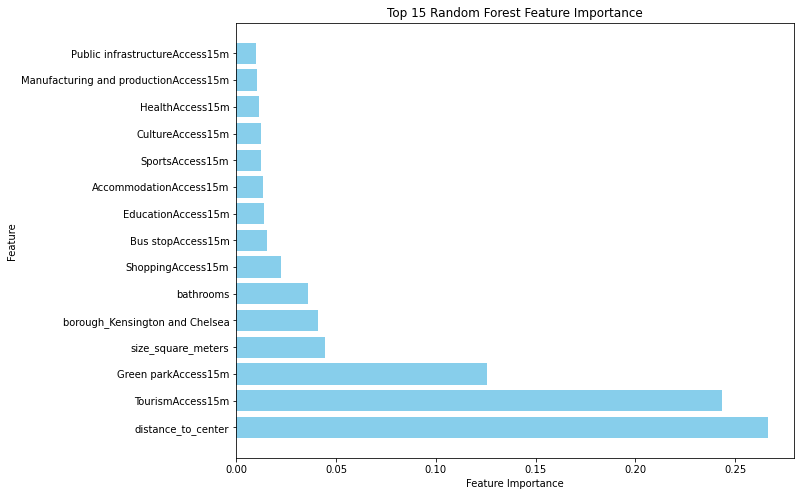

In [25]:
 # 获取特征重要性
feature_importance = rf_model.feature_importances_

# 将特征重要性和特征名称对应起来，并按重要性值降序排序
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# 只保留前15个特征
top_15_features = feature_importance_df.head(15)

# 绘制横向柱状图
plt.figure(figsize=(10, 8))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Random Forest Feature Importance')
plt.show()


lightGBM

In [26]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def train_lightgbm_model(X_train, X_test, y_train, y_test):
    # Create LightGBM regression model
    lgb_model = lgb.LGBMRegressor()

    # Train the model
    lgb_model.fit(X_train, y_train)

    # Use the model for predictions
    y_train_pred = lgb_model.predict(X_train)
    y_test_pred = lgb_model.predict(X_test)

    # Calculate R2 scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate root mean squared errors (RMSE)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    #print(f"Train R2 Score: {r2_train:.2f}")
    print(f"Test R2 Score: {r2_test:.2f}")
    #print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")

    return lgb_model

# Assuming X_train, X_test, y_train, y_test are defined as before
lightgbm_model = train_lightgbm_model(X_train, X_test, y_train, y_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2794
[LightGBM] [Info] Number of data points in the train set: 2989, number of used features: 71
[LightGBM] [Info] Start training from score 9671.342140
Test R2 Score: 0.69
Test RMSE: 3047.82


---

HybridRegression模型由来自先前模型的50%随机森林（rf_model）、50% XGBoost（xgb_model）

RMSE:  1710.4734579024987

R^2:  0.7130800590357023

MAPE:  17.25%

In [27]:
# 获得每个模型的预测结果
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# 结合两个模型的预测结果
final_preds = (rf_preds + xgb_preds) / 2

# 评估组合模型的性能
mse = mean_squared_error(y_test, final_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_preds)

print('RMSE: ', rmse)
print('R^2: ', r2)

# Define function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for final_preds
mape = calculate_mape(y_test, final_preds)

print('MAPE: ',  f"{mape:.2f}%")



RMSE:  2733.374775465582
R^2:  0.7486443697945915
MAPE:  17.69%


结果一样的

In [28]:
class HybridRegressor:
    def __init__(self, model1, model2, weight1=0.5):
        self.model1 = model1
        self.model2 = model2
        self.weight1 = weight1
        self.weight2 = 1 - weight1

    def predict(self, X):
        pred1 = self.model1.predict(X)
        pred2 = self.model2.predict(X)
        return self.weight1 * pred1 + self.weight2 * pred2


In [29]:
# Initialize the hybrid model
hybrid_model = HybridRegressor(rf_model, xgb_model, weight1=0.5)


# Use the hybrid model to make predictions
predictions = hybrid_model.predict(X_test)

# Calculate R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')



y_train_pred = hybrid_model.predict(X_train)
y_test_pred = hybrid_model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


# 计算训练集和测试集的R²值
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")



R^2: 0.7486443697945915


Train RMSE: 874.6401403568696
Test RMSE: 2733.374775465582
Train R²: 0.9748444190106353
Test R²: 0.7486443697945915


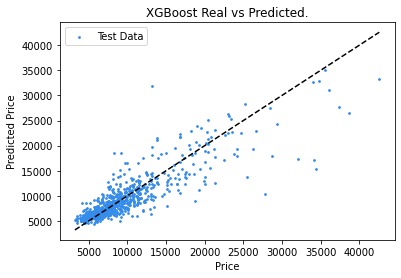

In [30]:

y_test_pred = xgb_model.predict(X_test)

# 绘制测试集的散点图，设置颜色为蓝色，大小为10
plt.scatter(y_test.to_numpy(), y_test_pred, color='#358CEA', s=3, label='Test Data')

# 绘制对角线，表示完美预测的线
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color='black', linestyle='--')

plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Real vs Predicted.')
plt.legend()
plt.show()

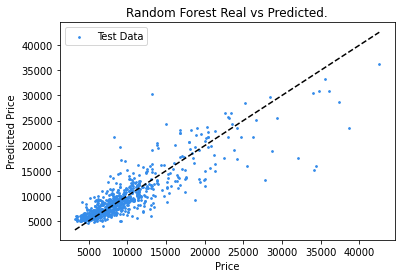

In [31]:

y_test_pred = rf_model.predict(X_test)

# 绘制测试集的散点图，设置颜色为蓝色，大小为10
plt.scatter(y_test.to_numpy(), y_test_pred, color='#358CEA', s=3, label='Test Data')

# 绘制对角线，表示完美预测的线
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color='black', linestyle='--')

plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Real vs Predicted.')
plt.legend()
plt.show()

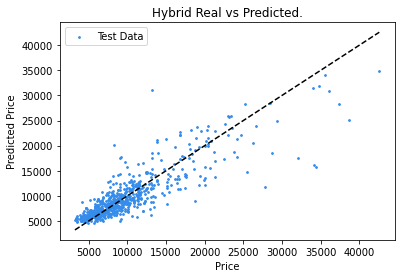

In [32]:

y_test_pred = hybrid_model.predict(X_test)

# 绘制测试集的散点图，设置颜色为蓝色，大小为10
plt.scatter(y_test.to_numpy(), y_test_pred, color='#358CEA', s=3, label='Test Data')

# 绘制对角线，表示完美预测的线
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color='black', linestyle='--')

plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Hybrid Real vs Predicted.')
plt.legend()
plt.show()